In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
from sklearn.base import TransformerMixin
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv('Data/veterans.csv',index_col=0)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(50127, 481)

In [4]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,ADM,0,CA,92375,NaN,NaN,5401,0,NaN,...,0.0,0,L,2,F,X,X,X,24.0,A
1,9401,MBC,0,MI,49453,NaN,NaN,5801,0,NaN,...,0.0,1,L,2,F,X,X,X,42.0,C
2,8601,BHG,2,CA,94070,NaN,NaN,4105,0,NaN,...,0.0,1,L,1,G,X,X,X,7.0,A
3,8601,BHG,0,WI,54880,NaN,NaN,0,0,NaN,...,12.0,0,L,3,D,X,X,X,49.0,B
4,9201,ESN,0,IL,60162,NaN,NaN,2110,0,NaN,...,0.0,1,L,1,G,X,X,X,13.0,A


In [5]:
data["TARGET_B"].mean()

0.09661459891874638

In [6]:
data.describe()

,ODATEDW,TCODE,DOB,CLUSTER,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,50127.000000,50127.000000,50127.000000,48876.000000,37667.000000,6453.000000,38957.000000,26582.000000,50127.000000,22332.000000,...,50127.000000,44927.000000,44927.000000,50127.000000,50127.000000,50127.000000,50127.000000,50127.000000,50127.000000,50058.000000
mean,9139.907216,57.724619,2714.593433,27.939582,61.704755,1.522858,3.886413,5.344594,3.343488,0.153770,...,9134.159056,9149.866361,8.084404,13.324361,96028.055379,0.096615,1.509540,0.498534,1.922218,31.452435
std,344.131103,1004.773818,2126.546961,14.427123,16.610663,0.798118,1.854805,2.749321,9.494545,0.472899,...,320.188790,294.195865,8.124036,11.119029,55407.293794,0.295435,6.022317,0.500003,1.078158,18.784004
min,8501.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,7703.000000,0.000000,1.285714,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,109.500000,15.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.333333,48008.500000,0.000000,0.000000,0.000000,1.000000,14.000000
50%,9201.000000,1.000000,2608.000000,28.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,...,9201.000000,9203.000000,6.000000,11.571429,96093.000000,0.000000,0.000000,0.000000,2.000000,32.000000
75%,9501.000000,2.000000,4502.000000,40.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.428571,144165.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,53.000000,98.000000,6.000000,7.000000,9.000000,241.000000,6.000000,...,9603.000000,9702.000000,1088.000000,948.500000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


## pop target columns

In [7]:
target_b = data.pop('TARGET_B')
target_d = data.pop('TARGET_D')

In [8]:
percents = data.isnull().sum() / data.shape[0]

In [9]:
for col,value in zip(percents.index,percents):
    if value > 0.2:
        data.drop([col],inplace=True,axis=1)

In [10]:
data.shape

(50127, 353)

### Clear NOEXCH duplicate values

In [11]:
noe = data["NOEXCH"]

In [12]:
data["NOEXCH"] = noe.apply(lambda x: str(x))
data["NOEXCH"] = noe.apply(lambda x: '1.0' if x == '1' else x)
data["NOEXCH"] = noe.apply(lambda x: '0.0' if x == '0' else x)
data["NOEXCH"] = noe.apply(lambda x: np.nan if x == 'nan' else x)

In [13]:
data["NOEXCH"].unique()

array(['0.0', '1.0', 'X', nan], dtype=object)

## Split on train and test data

In [14]:
X_train = data.iloc[:37595]
X_test = data.iloc[37595:]
y_train = target_b.iloc[:37595]
y_test = target_b.iloc[37595:]

## Numeric data

In [15]:
data_numerics = X_train.select_dtypes(include = ['number'])

In [16]:
data_numerics.shape

(37595, 330)

In [17]:
num_pipeline = Pipeline([
    ('imputer',Imputer()),
    ('variance',VarianceThreshold(0.2)),
    ('scaling',MinMaxScaler()),
])

In [18]:
numerics_proc = num_pipeline.fit_transform(data_numerics)

In [19]:
accepted_col = data_numerics.columns[num_pipeline.steps[1][1].get_support()]

In [20]:
data_num_proc = pd.DataFrame(numerics_proc,columns=accepted_col)

In [21]:
data_num_proc.head()

,ODATEDW,TCODE,DOB,CLUSTER,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.333333,0.000000,0.556345,0.230769,0.000000,0.020619,0.414141,0.242424,0.474747,0.267606,...,0.035524,0.045226,0.927939,0.633298,0.006434,0.012602,0.809020,0.0,0.333333,0.377049
1,0.750000,0.000000,0.597548,0.826923,0.016598,0.000000,0.313131,0.373737,0.252525,0.140845,...,0.035524,0.492462,0.978965,0.844573,0.005515,0.011311,0.383180,1.0,0.333333,0.672131
2,0.083333,0.000028,0.422847,0.230769,0.053942,0.000000,0.353535,0.181818,0.484848,0.140845,...,0.047957,0.045226,0.896595,0.476818,0.010110,0.013039,0.848473,1.0,0.000000,0.098361
3,0.083333,0.000000,0.000000,0.576923,0.000000,0.000000,0.292929,0.454545,0.434343,0.042254,...,0.012433,0.045226,0.906279,0.478398,0.008272,0.003238,0.425631,0.0,0.666667,0.786885
4,0.583333,0.000000,0.217347,0.519231,0.008299,0.000000,0.333333,0.212121,0.595960,0.112676,...,0.044405,0.045226,0.958138,0.738672,0.004596,0.023116,0.469620,1.0,0.000000,0.196721


In [22]:
data_num_proc.shape

(37595, 324)

## Categorical data

In [23]:
data_categorical = X_train.select_dtypes(exclude = ['number'])

In [24]:
data_categorical.shape

(37595, 23)

In [25]:
data_categorical.head()

,OSOURCE,STATE,ZIP,NOEXCH,MDMAUD,DOMAIN,GENDER,RFA_2,RFA_3,RFA_4,...,RFA_9,RFA_11,RFA_12,RFA_14,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,ADM,CA,92375,0.0,XXXX,S1,M,L2F,A2F,A2F,...,A1F,A1F,A1F,A1F,L,F,X,X,X,A
1,MBC,MI,49453,0.0,XXXX,R2,F,L2F,A2F,A2F,...,A1E,A1E,A1E,A2F,L,F,X,X,X,C
2,BHG,CA,94070,0.0,XXXX,S1,M,L1G,A1G,A1G,...,A1F,A1F,A1F,A1F,L,G,X,X,X,A
3,BHG,WI,54880,0.0,XXXX,C3,F,L3D,S3D,S3D,...,S3D,S4D,S4D,S4D,L,D,X,X,X,B
4,ESN,IL,60162,0.0,XXXX,C2,F,L1G,A1G,A1G,...,S2G,S2G,S2G,S2G,L,G,X,X,X,A


In [26]:
class TopValueImputer(TransformerMixin):
    
    def __init__(self):
        self.top_values = {} # {'nazwa_kolumny': najczęstsza wartość}
    
    def fit(self, X, y=None):
        # zapamiętanie najczęstszego poziomu dla każdej z kolumn
        for col in X.columns:
            counts = X[col].value_counts()
            if counts.shape[0] == 0:
                self.top_values[col] = 'nan'
                continue
            top_count = counts.argmax()
            self.top_values[col] = top_count            
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        # uzupełnienie danych odpowiednią wartością
        for col in X.columns:
            X[col] = X[col].fillna(self.top_values[col])
        return X


In [27]:
class FilterCategoricalWithLevelThreshold(TransformerMixin):
    def __init__(self,k):
        self.filtered_col = [] # cols to keep
        self.k = k # maximal number of levels in col
        
    def fit(self,X,y=None):
        levels_count = X.apply(lambda x: len(x.unique())).sort_values(ascending=False)
        self.filtered_col =  levels_count[levels_count <=  self.k].index
        return self
    
    def transform(self,X,y=None):
        X = X.copy()
        X = X[self.filtered_col]
        return X
    

In [28]:
class RobustOneHotEncoding(TransformerMixin):
    def __init__(self):
        self.columns = None
    
    def fit(self, X, y=None):
        # zapamiętanie, jakie kolumny mogą pojawić się z one hot encoding
        self.columns = pd.get_dummies(X).columns        
        return self
    
    def transform(self, X, y=None):
        # zrobić pd.get_dummies i uzupełnić brakujące kolumny, ewentualnie usunąć nadmiarowe
        new_dummies = pd.get_dummies(X)
        dummy_cols = new_dummies.columns
            
        filtered_data = pd.DataFrame()
        
        # respect order of columns
        for col in self.columns:

            #add empty col
            if col not in dummy_cols:
                #print(col)
                filtered_data[col] = 0                
                #print(filtered_data.shape)
            else:
                filtered_data[col] = new_dummies[col]
        
        if filtered_data.isnull().sum().sum() > 0:
            filtered_data.fillna(value=0,axis=1,inplace=True)
            filtered_data = filtered_data.astype('uint8')
            
        return filtered_data     

In [29]:
cat_pipeline = Pipeline([
    ('filter',FilterCategoricalWithLevelThreshold(10)),
    ('imputer',TopValueImputer()),
    ('dummy',RobustOneHotEncoding())
])

In [30]:
cat_proc = cat_pipeline.fit_transform(data_categorical)

In [31]:
cat_proc.shape

(37595, 31)

In [32]:
cat_proc.columns

Index(['GENDER_A', 'GENDER_F', 'GENDER_J', 'GENDER_M', 'GENDER_U',
       'MDMAUD_A_C', 'MDMAUD_A_L', 'MDMAUD_A_M', 'MDMAUD_A_T', 'MDMAUD_A_X',
       'MDMAUD_R_C', 'MDMAUD_R_D', 'MDMAUD_R_I', 'MDMAUD_R_L', 'MDMAUD_R_X',
       'GEOCODE2_A', 'GEOCODE2_B', 'GEOCODE2_C', 'GEOCODE2_D', 'RFA_2A_D',
       'RFA_2A_E', 'RFA_2A_F', 'RFA_2A_G', 'NOEXCH_0.0', 'NOEXCH_1.0',
       'NOEXCH_X', 'MDMAUD_F_1', 'MDMAUD_F_2', 'MDMAUD_F_5', 'MDMAUD_F_X',
       'RFA_2R_L'],
      dtype='object')

In [33]:
cat_proc.head()

,GENDER_A,GENDER_F,GENDER_J,GENDER_M,GENDER_U,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,...,RFA_2A_F,RFA_2A_G,NOEXCH_0.0,NOEXCH_1.0,NOEXCH_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,RFA_2R_L
0,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,1
2,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,1


## Merge num and categorical data

In [34]:
data_train = pd.concat([data_num_proc, cat_proc], axis=1)

In [35]:
data_train.shape

(37595, 355)

In [36]:
y_train.shape

(37595,)

## XGBoost

In [55]:
estimator = XGBClassifier(learning_rate=0.05, n_estimators=200, colsample_bytree=0.5, n_jobs=-1)

xgboost_score = cross_val_score(estimator=estimator,X=data_train,y=y_train,cv=KFold(5,shuffle=True),scoring='roc_auc')

In [56]:
xgboost_score

array([ 0.61803376,  0.63181015,  0.63562595,  0.62110035,  0.6183998 ])

In [57]:
xgboost_score.mean()

0.62499400029504659

In [58]:
estimator.fit(data_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

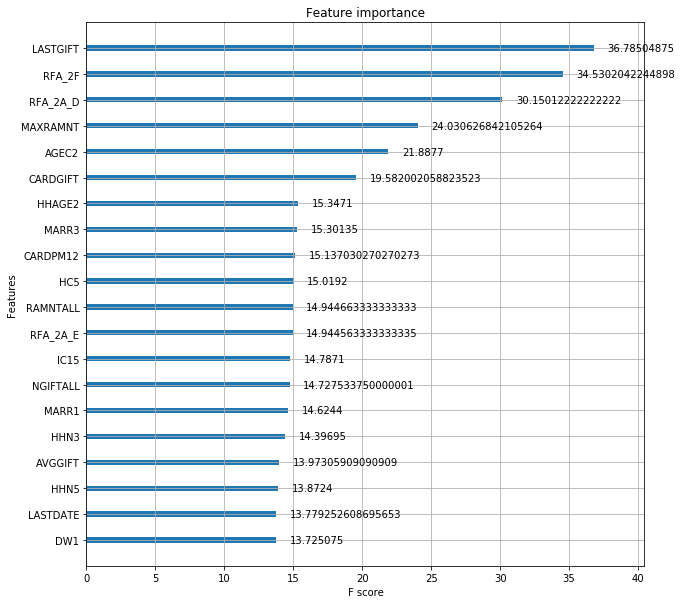

In [59]:
plt.figure(figsize=(10,10))
plot_importance(booster=estimator,max_num_features=20,ax=plt.gca(),importance_type='gain')
plt.show()

In [60]:
roc_auc_score(y_true=y_train,y_score=estimator.predict_proba(data_train)[:,1])

0.70890745449518855

In [61]:
(fpr_train,tpr_train,_) = roc_curve(y_true=y_train,y_score=estimator.predict_proba(data_train)[:,1])

## Test data

### Numeric

In [63]:
test_numerics = X_test.select_dtypes(include = ['number'])

In [64]:
test_numerics_proc = num_pipeline.transform(test_numerics)

In [65]:
test_num_proc = pd.DataFrame(test_numerics_proc,columns=accepted_col)

In [66]:
test_num_proc.shape

(12532, 324)

### Categorical

In [80]:
test_categorical = X_test.select_dtypes(exclude = ['number'])

In [81]:
test_cat_proc = cat_pipeline.transform(test_categorical)
test_cat_proc = test_cat_proc.reset_index(drop=True)

In [82]:
test_cat_proc.head()

,GENDER_A,GENDER_F,GENDER_J,GENDER_M,GENDER_U,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,...,RFA_2A_F,RFA_2A_G,NOEXCH_0.0,NOEXCH_1.0,NOEXCH_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,RFA_2R_L
0,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,1
3,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,1
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,1


In [83]:
test_cat_proc.shape

(12532, 31)

### Join test data

In [84]:
data_test = pd.concat([test_num_proc, test_cat_proc], axis=1)

In [85]:
test_num_proc.head()

,ODATEDW,TCODE,DOB,CLUSTER,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.583333,0.000000,0.000000,0.634615,0.004149,0.278351,0.444444,0.525253,0.191919,0.084507,...,0.056838,0.005025,0.959075,0.790832,0.006434,0.026092,0.593177,1.0,0.0,0.590164
1,0.250000,0.000000,0.413061,0.519231,0.049793,0.000000,0.373737,0.171717,0.575758,0.042254,...,0.044405,0.502513,0.917318,0.634352,0.021140,0.015745,0.159599,1.0,0.0,0.557377
2,0.833333,0.000389,0.463638,0.750000,0.004149,0.051546,0.353535,0.333333,0.505051,0.098592,...,0.035524,0.040201,0.990420,0.709714,0.007417,0.019757,0.656950,0.0,0.0,0.590164
3,0.500000,0.000014,0.567161,0.173077,0.000000,0.000000,0.141414,0.191919,0.242424,0.042254,...,0.035524,0.492462,0.947829,0.688620,0.008272,0.012543,0.749439,0.0,0.0,0.737705
4,0.916667,0.000014,0.134013,0.500000,0.000000,0.000000,0.363636,0.373737,0.272727,0.098592,...,0.035524,0.492462,0.999792,0.709714,0.007417,0.019757,0.942954,1.0,0.0,0.557377


In [87]:
data_test.shape

(12532, 355)

In [88]:
test_num_proc.shape

(12532, 324)

In [89]:
test_cat_proc.shape

(12532, 31)

In [90]:
y_test.shape

(12532,)

### Check result on test dataset

In [91]:
roc_auc_score(y_true=y_test,y_score=estimator.predict_proba(data_test)[:,1])

0.61883271874910672

In [92]:
(fpr_test,tpr_test,_) = roc_curve(y_true=y_test,y_score=estimator.predict_proba(data_test)[:,1])

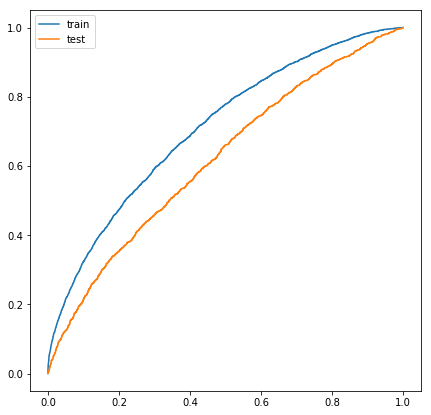

In [96]:
plt.figure(figsize=(7,7))
plt.plot(fpr_train,tpr_train,label='train')
plt.plot(fpr_test,tpr_test,label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.pipeline import FeatureUnion